In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset=pd.read_csv("Placement.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Placement.csv'

In [ ]:
#1.replace the nan values and justify it

In [ ]:
dataset.isnull().sum()

In [ ]:
dataset["salary"].fillna(0,inplace=True)

In [ ]:
dataset.isnull().sum()

In [ ]:
#2. Howmany of them are not placed?

In [ ]:
dataset["status"].value_counts()

In [ ]:
#3.reason for non placement(less mba_p marks)

In [ ]:
df=pd.DataFrame(dataset)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

placed = df[df['status'] == 'Placed']
not_placed = df[df['status'] == 'Not Placed']
columns=['ssc_p', 'hsc_p', 'etest_p', 'mba_p']

descriptive=pd.DataFrame(index=["placed","not_placed","diff"],columns=['ssc_p', 'hsc_p', 'etest_p', 'mba_p'])

for columname in columns:  
    descriptive[columname]["placed"]=placed[columname].mean()
    descriptive[columname]["not_placed"]=not_placed[columname].mean()
    descriptive[columname]["diff"]=descriptive[columname]["placed"]-descriptive[columname]["not_placed"]
descriptive
plt.figure(figsize=(10, 6))
sns.barplot(x=descriptive.columns, y=descriptive[columname]["diff"], palette='coolwarm')
plt.title('Difference in Key Features Between Placed and Not Placed Students')
plt.xlabel('Features')
plt.ylabel('Mean Difference')
plt.axhline(0, color='black', linestyle='--')
plt.show()

NameError: name 'df' is not defined

In [13]:
#4. what kind of relationship between mba and salary

In [14]:
correlation=df['mba_p'].corr(df['salary'])

In [15]:
correlation

0.13982273892615565

In [16]:
#This value is not close to 1 so negative corr..if mba marks higher salary also get lower.

In [17]:
#5. which specialisation is getting min salary?

In [18]:
dataset['specialisation'].value_counts()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

C:\Users\argka\AppData\Local\Temp\ipykernel_17348\2878713991.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["salary"].fillna(0,inplace=True)


Minimum Salary by Specialization (Excluding 0):
specialisation
Mkt&Fin    200000.0
Mkt&HR     200000.0
Name: salary, dtype: object


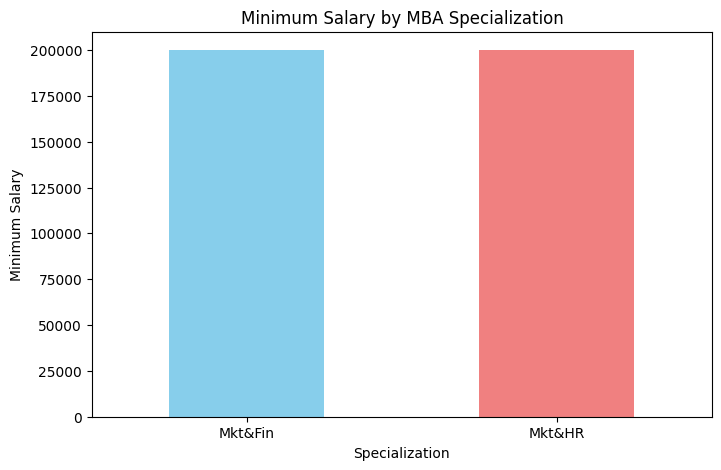

In [32]:
# Replace 0 in the salary column with NaN (if 0 represents missing data)
dataset["salary"].fillna(0,inplace=True)

# Drop rows with missing salaries
df_clean = df.dropna(subset=['salary'])

# Group by specialization and find the minimum salary
min_salary_by_specialisation = df_clean.groupby('specialisation')['salary'].min()

# Display results
print("Minimum Salary by Specialization (Excluding 0):")
print(min_salary_by_specialisation)

# Visualization
min_salary_by_specialisation.plot(kind='bar', color=['skyblue', 'lightcoral'], figsize=(8, 5))
plt.title('Minimum Salary by MBA Specialization')
plt.xlabel('Specialization')
plt.ylabel('Minimum Salary')
plt.xticks(rotation=0)
plt.show()


#6. Howmany of them are getting above 500000salary?


In [54]:
above_5_lakhs = df[df['salary']>500000]

In [55]:
above_5_lakhs

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,120,M,60.8,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
150,151,M,71.0,Central,58.66,Central,Science,58.0,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
177,178,F,73.0,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0


In [52]:
above_5_lakhs = df[df['salary']>500000].shape[0]

In [53]:
above_5_lakhs

3

In [22]:
#Anavo etest and mba

import scipy.stats as stats

f_stat, p_value =stats.f_oneway(df['etest_p'], df['mba_p'])




In [23]:
value= 0.05
if p_value <= value:
    print("Reject the null hypothesis: Significant difference exists between etest_p and mba_p.")
else:
    print("Fail to reject the null hypothesis: No significant difference between etest_p and mba_p.")



Reject the null hypothesis: Significant difference exists between etest_p and mba_p.


In [24]:
# 7.T_test degree,specialisation with salary

In [25]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
degree = dataset[dataset['degree_t']=='Sci&Tech']['salary']
special= dataset[dataset['specialisation']=='Mkt&HR']['salary']
#print(male)
ttest_ind(degree, special)

TtestResult(statistic=2.692041243555374, pvalue=0.007897969943471179, df=152.0)

In [26]:
# result =There is significant difff exists bw etst and spe with salary

In [27]:
#8. Z_score(normal distribution to std normal distribution

clean_salary=df["salary"].dropna()

In [ ]:
mean_salary=df["salary"].mean()

In [ ]:
mean_salary

In [ ]:
std_salary=df["salary"].std()

In [ ]:
std_salary

In [ ]:
z_score=(clean_salary-mean_salary)/std_salary

In [ ]:
z_score

In [ ]:
#From z_score negative values are below mean,positive values are above mean

In [ ]:
#9. PDF for salary range 5l to 7l?

In [ ]:
salary_range = np.linspace(700000, 900000, 100)
from scipy.stats import norm



In [ ]:
pdf_values = norm.pdf(salary_range, mean_salary, std_salary)


In [ ]:
pdf_values


In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(salary_range, pdf_values, label='PDF', color='blue')
plt.title('Probability Density Function for Salary')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.grid()
plt.legend()
plt.show()

In [ ]:
#10.paired T_test

In [ ]:
from scipy.stats import ttest_rel
dataset=dataset.dropna()
etest = dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
mba_p= dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
#print(male)
ttest_ind(etest,mba_p)

In [ ]:
#There is no significant diff bw sci&tech with etest_p,mba_p 

In [ ]:
#11.Which parameter is highly correlated with salary?

In [ ]:
df=pd.DataFrame(dataset)
df=pd.get_dummies(df,drop_first=True)

In [ ]:
 
correlations = df.corr()

# Extract correlation of all features with salary
salary_correlation = correlations['salary'].sort_values(ascending=True)

# Print the correlations
print("Correlation of parameters with salary:")
print(salary_correlation)


In [ ]:
#salary is highly correlated with placement status

In [ ]:
#12.Plot any useful graph and explain

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load salary data, dropping NaN values
salary = df['salary'].dropna()

# Set up the figure
plt.figure(figsize=(12, 6))

# Subplot 1: Histogram of Salary
plt.subplot(1, 2, 1)
sns.histplot(salary, bins=15, kde=True, color='blue')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')



# Show the plots
plt.tight_layout()
plt.show()

C:\Users\argka\AppData\Local\Temp\ipykernel_17348\965210320.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  descriptive[columname]["placed"]=placed[columname].mean()
C:\Users\argka\AppData\Local\Temp\ipykernel_17348\965210320.py:12: Fut

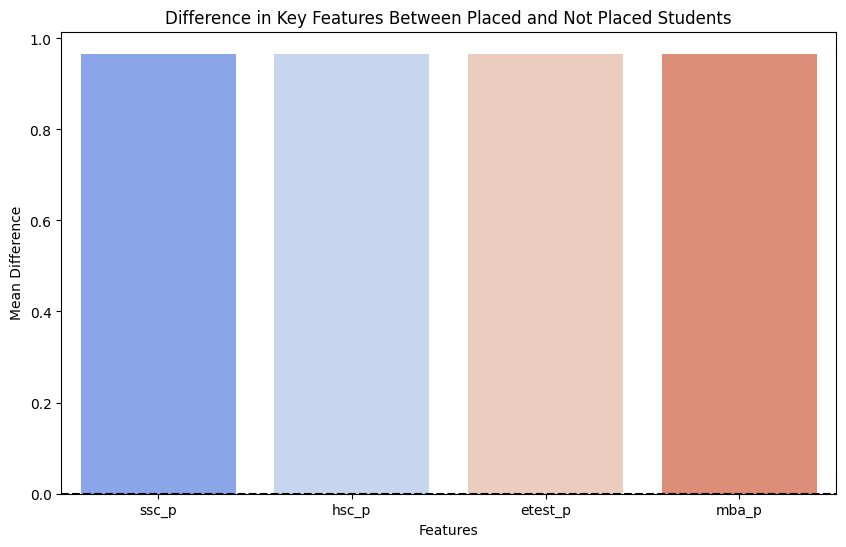

In [ ]:
descriptive